# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
analyzer = SentimentIntensityAnalyzer()

%matplotlib inline

In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv('NEWS_API_KEY')

nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/christiankunz/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
btc_articles = newsapi.get_everything(q='bitcoin', language='en', sort_by='relevancy')

In [5]:
# Fetch the Ethereum news articles
eth_articles = newsapi.get_everything(q='ethereum', language='en', sort_by='relevancy')

In [6]:
# Create the Bitcoin sentiment scores DataFrame
btc_sentiment = []

for article in btc_articles['articles']:
    try:
        text = article['content']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        btc_sentiment.append({
            'Compound': compound,
            'Negative': neg,
            'Neutral': neu,
            'Positive': pos,
            'text': text
        })
        
    except AttributeError:
        pass

btc_sentiment_df = pd.DataFrame(btc_sentiment)

btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text
0,0.0772,0.000,0.961,0.039,Whether youre looking to make a larger investm...
1,0.5859,0.000,0.873,0.127,"As it promised earlier this year, Tesla now ac..."
2,0.3182,0.000,0.935,0.065,The inevitable has happened: You can now purch...
3,0.2023,0.000,0.950,0.050,Tesla made headlines earlier this year when it...
4,0.6075,0.102,0.719,0.178,National Burrito Day lands on April Fools Day ...


In [7]:
# Create the ethereum sentiment scores DataFrame
eth_sentiment = []

for article in eth_articles['articles']:
    try:
        text = article['content']
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment['compound']
        pos = sentiment['pos']
        neu = sentiment['neu']
        neg = sentiment['neg']
        
        eth_sentiment.append({
            'Compound': compound,
            'Negative': neg,
            'Neutral': neu,
            'Positive': pos,
            'text': text
        })
        
    except AttributeError:
        pass

eth_sentiment_df = pd.DataFrame(eth_sentiment)

eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text
0,-0.5574,0.110,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...
1,0.0772,0.000,0.961,0.039,Whether youre looking to make a larger investm...
2,0.0000,0.000,1.000,0.000,Famed auction house Christies just sold its fi...
3,0.0000,0.000,1.000,0.000,Payment card network Visa has announced that t...
4,0.5650,0.093,0.735,0.172,The NFT craze has been an intriguing moment fo...


In [8]:
# Describe the Bitcoin Sentiment
btc_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.208190,0.028250,0.898050,0.073700
std,0.366353,0.047327,0.082335,0.067464
min,-0.557400,0.000000,0.709000,0.000000
25%,0.000000,0.000000,0.863250,0.029250
50%,0.318200,0.000000,0.925000,0.066000
75%,0.366350,0.054500,0.940250,0.085500
max,0.771700,0.142000,1.000000,0.240000


In [9]:
# Describe the Ethereum Sentiment
eth_sentiment_df.describe()

,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.005275,0.039850,0.920600,0.039600
std,0.314927,0.048404,0.079985,0.051074
min,-0.557400,0.000000,0.735000,0.000000
25%,-0.250000,0.000000,0.909500,0.000000
50%,0.000000,0.000000,0.934000,0.000000
75%,0.142900,0.080750,1.000000,0.077750
max,0.565000,0.145000,1.000000,0.172000


In [10]:
# Below to help answering the questions
eth_raw = eth_sentiment_df.describe()
eth_mean_pos = eth_raw.loc['mean','Positive']
eth_max_comp = eth_raw.loc['max','Compound']
eth_max_pos = eth_raw.loc['max','Positive']

btc_raw = btc_sentiment_df.describe()
btc_mean_pos = btc_raw.loc['mean','Positive']
btc_max_comp = btc_raw.loc['max','Compound']
btc_max_pos = btc_raw.loc['max','Positive']

# Merging results into DataFrame
index = ['Bitcoin', 'Ethereum']
data = [
    {'Mean Positive Score': btc_mean_pos, 'Max Compound Score': btc_max_comp, 'Max Positive Score': btc_max_pos},
    {'Mean Positive Score': eth_mean_pos, 'Max Compound Score': eth_max_comp, 'Max Positive Score': eth_max_pos}
]

# Create the pandas DataFrame
df = pd.DataFrame(data, index=index)
df

# Mean Positive Score
df_mean_pos = df.sort_values(by=['Mean Positive Score'], ascending=False)
best_coin_mean_pos = df_mean_pos.iloc[:1].index[0]
mean_pos = round(df_mean_pos.iloc[0,0],5)

# Max Compound Score
df_max_comp = df.sort_values(by=['Max Compound Score'], ascending=False)
best_coin_comp = df_max_comp.iloc[:1].index[0]
max_comp = df_max_comp.iloc[0,1]

# Max Positive Score
df_max_pos = df.sort_values(by=['Max Positive Score'], ascending=False)
best_coin_pos = df_max_pos.iloc[:1].index[0]
max_pos = df_max_pos.iloc[0,2]

### Questions:

In [11]:
print(f'''
Q: Which coin had the highest mean positive score?
 
    {best_coin_mean_pos}  
    Score: {mean_pos}

Q: Which coin had the highest compound score?
 
    {best_coin_comp}  
    Score: {max_comp}

Q. Which coin had the highest positive score?
 
    {best_coin_pos}  
    Score: {max_pos}''')


Q: Which coin had the highest mean positive score?
 
    Bitcoin  
    Score: 0.0737

Q: Which coin had the highest compound score?
 
    Bitcoin  
    Score: 0.7717

Q. Which coin had the highest positive score?
 
    Bitcoin  
    Score: 0.24


---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [12]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [13]:
# Expand the default stopwords list if necessary
sw_addons = {'char'}

In [14]:
# Complete the tokenizer function

def tokenizer(text):
    """Tokenizes text."""
    
    lemmatizer = WordNetLemmatizer()

    sw = set(stopwords.words('english'))
    regex = re.compile('[^a-zA-Z ]')
    re_clean = regex.sub('', text)
    words = word_tokenize(re_clean)
    lem = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word.lower() for word in lem if word.lower() not in sw.union(sw_addons)]

    return tokens

In [15]:
# Create a new tokens column for bitcoin
token_results_btc = []
    
for row in btc_sentiment_df.index:
    token_row_btc = btc_sentiment_df['text'][row]
    token_btc = tokenizer(token_row_btc)
    token_results_btc.append(token_btc)

btc_sentiment_df['tokens'] = token_results_btc   
btc_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,0.0772,0.000,0.961,0.039,Whether youre looking to make a larger investm...,"[whether, youre, looking, make, larger, invest..."
1,0.5859,0.000,0.873,0.127,"As it promised earlier this year, Tesla now ac...","[promised, earlier, year, tesla, accepts, paym..."
2,0.3182,0.000,0.935,0.065,The inevitable has happened: You can now purch...,"[inevitable, ha, happened, purchase, tesla, ve..."
3,0.2023,0.000,0.950,0.050,Tesla made headlines earlier this year when it...,"[tesla, made, headline, earlier, year, took, s..."
4,0.6075,0.102,0.719,0.178,National Burrito Day lands on April Fools Day ...,"[national, burrito, day, land, april, fools, d..."


In [16]:
# Create a new tokens column for ethereum
token_results_eth = []
    
for row in eth_sentiment_df.index:
    token_row_eth = eth_sentiment_df['text'][row]
    token_eth = tokenizer(token_row_eth)
    token_results_eth.append(token_eth)

eth_sentiment_df['tokens'] = token_results_eth   
eth_sentiment_df.head()

,Compound,Negative,Neutral,Positive,text,tokens
0,-0.5574,0.110,0.890,0.000,One of the strictest crackdowns worldwide\r\nP...,"[one, strictest, crackdown, worldwidephoto, mi..."
1,0.0772,0.000,0.961,0.039,Whether youre looking to make a larger investm...,"[whether, youre, looking, make, larger, invest..."
2,0.0000,0.000,1.000,0.000,Famed auction house Christies just sold its fi...,"[famed, auction, house, christies, sold, first..."
3,0.0000,0.000,1.000,0.000,Payment card network Visa has announced that t...,"[payment, card, network, visa, ha, announced, ..."
4,0.5650,0.093,0.735,0.172,The NFT craze has been an intriguing moment fo...,"[nft, craze, ha, intriguing, moment, digital, ..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [17]:
from collections import Counter
from nltk import ngrams

In [18]:
# Generate the Bitcoin N-grams where N=2
btc_list = []

for row in btc_sentiment_df['tokens']:
    for item in row:
        btc_list.append(item)

bigram_counts_btc = Counter(ngrams(btc_list, n=2))
bigram_counts_btc.most_common(20)

[(('earlier', 'year'), 2),
 (('elon', 'musk'), 2),
 (('nonfungible', 'token'), 2),
 (('reuters', 'stafffile'), 2),
 (('stafffile', 'photo'), 2),
 (('virtual', 'currency'), 2),
 (('currency', 'bitcoin'), 2),
 (('bitcoin', 'us'), 2),
 (('dollar', 'banknote'), 2),
 (('banknote', 'seen'), 2),
 (('illustration', 'taken'), 2),
 (('taken', 'january'), 2),
 (('january', 'reutersdado'), 2),
 (('whether', 'youre'), 1),
 (('youre', 'looking'), 1),
 (('looking', 'make'), 1),
 (('make', 'larger'), 1),
 (('larger', 'investment'), 1),
 (('investment', 'want'), 1),
 (('want', 'dabble'), 1)]

In [19]:
# Generate the Ethereum N-grams where N=2
eth_list = []

for row in eth_sentiment_df['tokens']:
    for item in row:
        eth_list.append(item)

bigram_counts_eth = Counter(ngrams(eth_list, n=2))
bigram_counts_eth.most_common(20)

[(('nonfungible', 'token'), 2),
 (('cryptocurrency', 'platform'), 2),
 (('damien', 'hirst'), 2),
 (('one', 'strictest'), 1),
 (('strictest', 'crackdown'), 1),
 (('crackdown', 'worldwidephoto'), 1),
 (('worldwidephoto', 'michele'), 1),
 (('michele', 'doying'), 1),
 (('doying', 'vergeindia'), 1),
 (('vergeindia', 'reportedly'), 1),
 (('reportedly', 'moving'), 1),
 (('moving', 'forward'), 1),
 (('forward', 'sweeping'), 1),
 (('sweeping', 'ban'), 1),
 (('ban', 'cryptocurrencies'), 1),
 (('cryptocurrencies', 'according'), 1),
 (('according', 'reuters'), 1),
 (('reuters', 'country'), 1),
 (('country', 'legislat'), 1),
 (('legislat', 'whether'), 1)]

In [20]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [21]:
# Get the top 10 words for Bitcoin
token_count(btc_list)

[('bitcoin', 14),
 ('tesla', 6),
 ('year', 5),
 ('according', 5),
 ('ha', 5),
 ('cryptocurrencies', 4),
 ('reuters', 4),
 ('new', 4),
 ('paypal', 3),
 ('earlier', 3)]

In [22]:
# Get the top 10 words for Ethereum
token_count(eth_list)

[('new', 5),
 ('cryptocurrency', 5),
 ('ethereum', 4),
 ('million', 4),
 ('ha', 4),
 ('one', 3),
 ('cryptocurrencies', 3),
 ('country', 3),
 ('bitcoin', 3),
 ('sold', 3)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [23]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

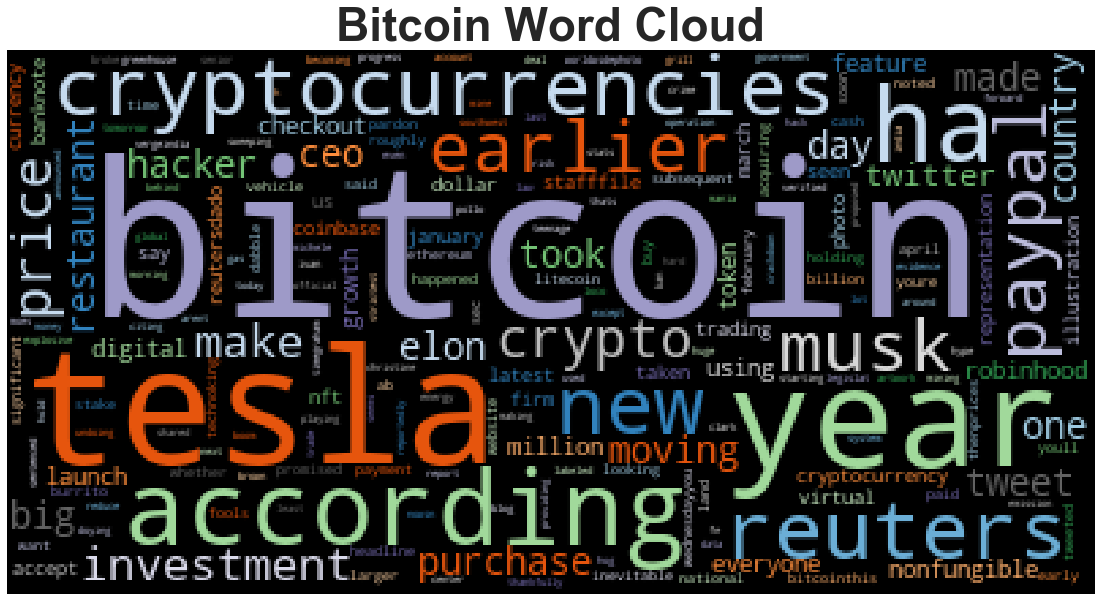

In [24]:
# Generate the Bitcoin word cloud
# using list comprehension
btc_cloud = ' '.join([str(elem) for elem in btc_list])

wc = WordCloud(colormap='tab20c')
btc_wordcloud = wc.generate(btc_cloud)
plt.axis('off')
plt.title('Bitcoin Word Cloud', fontsize=46, fontweight='bold')
plt.imshow(btc_wordcloud);

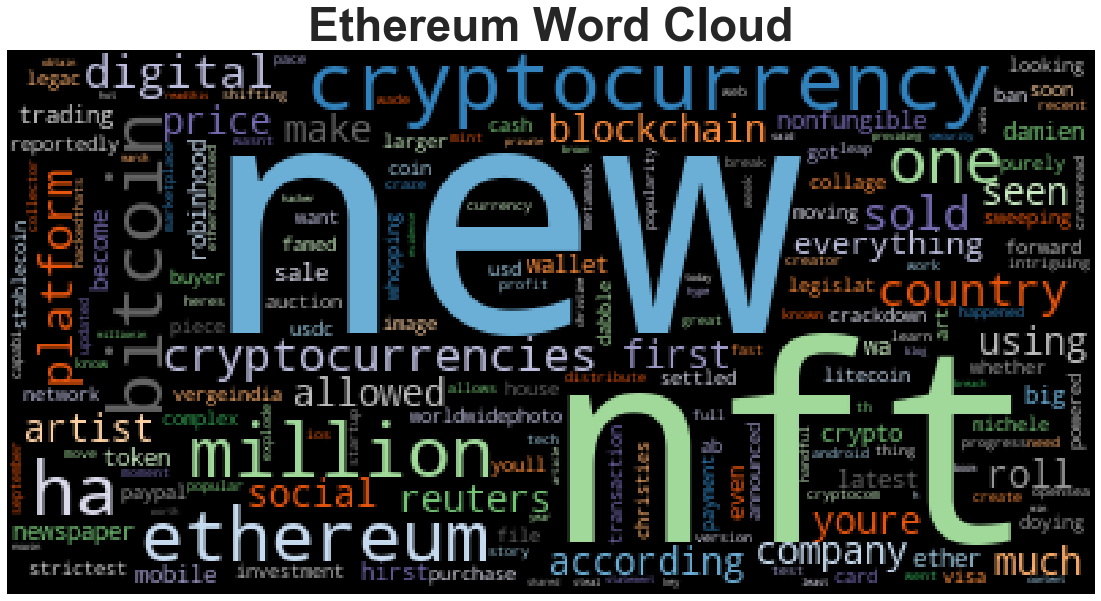

In [25]:
# Generate the Ethereum word cloud
# using list comprehension
eth_cloud = ' '.join([str(elem) for elem in eth_list])

wc = WordCloud(colormap='tab20c')
eth_wordcloud = wc.generate(eth_cloud)
plt.axis('off')
plt.title('Ethereum Word Cloud', fontsize=46, fontweight='bold')
plt.imshow(eth_wordcloud);

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [26]:
import spacy
from spacy import displacy

In [27]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [28]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [29]:
# Concatenate all of the bitcoin text together
btc_list_raw = []

for row in btc_sentiment_df['text']:
    btc_list_raw.append(row)

btc_ner_raw = ' '.join([str(elem) for elem in btc_list_raw])

btc_ner_raw

'Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll be ab… [+3818 chars] As it promised earlier this year, Tesla now accepts payment in Bitcoin, according to Tesla\'s website and a tweet from CEO Elon Musk. In a subsequent tweet, Musk said that "Bitcoin paid to Tesla will … [+1390 chars] The inevitable has happened: You can now purchase a Tesla vehicle with Bitcoin.\xa0\r\nThis is according to Tesla CEO, pardon, Technoking Elon Musk, who tweeted it on Wednesday.\xa0\r\nYou can now buy a Tesla … [+1648 chars] Tesla made headlines earlier this year when it took out significant holdings in bitcoin, acquiring a roughly $1.5 billion stake at then-prices in early February. At the time, it also noted in an SEC … [+2071 chars] National Burrito Day lands on April Fools Day this year, but thankfully restaurants arent playing around with their deals. Start

In [30]:
# Run the NER processor on all of the text
btc_ner = nlp(btc_ner_raw)

# Add a title to the document
btc_ner.user_data['title'] = 'Bitcoin NER'

In [31]:
# Render the visualization
displacy.render(btc_ner, style='ent')

In [32]:
# List all Entities
for ent in btc_ner.ents:
    print(ent.text, ent.label_)

Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
earlier this year DATE
Tesla ORG
Bitcoin PERSON
Tesla ORG
Elon Musk PERSON
Musk PERSON
Tesla ORG
Tesla ORG
Bitcoin PERSON
Elon Musk PERSON
Wednesday DATE
earlier this year DATE
roughly $1.5 billion MONEY
early February DATE
SEC ORG
National Burrito Day EVENT
April Fools Day DATE
this year DATE
tomorrow DATE
Pollo Loco FAC
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
last years DATE
Twitter PRODUCT
Graham Ivan Clark PERSON
Twitters NORP
India GPE
Reuters ORG
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
this morning TIME
millions CARDINAL
Funko PERSON
NFT ORG
TokenWave ORG
23, 2021 DATE
Spanish NORP
AI ORG
Bitcoin PERSON
The Wise Origin Bitcoin ETF WORK_OF_ART
the United States GPE
FD Funds Management LLC ORG
Reuters ORG
Bitcoin PERSON
U.S. GPE
January 8, 2021 DATE
Dado Ru PERSON
Reuters ORG
Bitcoin PERSON
U.S. GPE
January 27, 2020 DATE
PayPal PERSON
Julian Satterthwaite PERSON
another week DATE
Ma

---

## Ethereum NER

In [33]:
# Concatenate all of the ethereum text together
eth_list_raw = []

for row in eth_sentiment_df['text']:
    eth_list_raw.append(row)

eth_ner_raw = ' '.join([str(elem) for elem in eth_list_raw])

eth_ner_raw

"One of the strictest crackdowns worldwide\r\nPhoto by Michele Doying / The Verge\r\nIndia is reportedly moving forward with a sweeping ban on cryptocurrencies. According to Reuters, the countrys legislat… [+1656 chars] Whether youre looking to make a larger investment or you just want to dabble in cryptocurrencies, you can purchase Bitcoin, Ethereum, Bitcoin Cash, and Litecoin through PayPal. And, soon, youll be ab… [+3818 chars] Famed auction house Christies just sold its first purely digital piece of art for a whopping $69 million. For that price, the buyer got a digital file of a collage of 5,000 images and a complex legac… [+12891 chars] Payment card network Visa has announced that transactions can be settled using USD Coin (USDC), a stablecoin powered by the Ethereum blockchain. Crypto.com is the first company to test the new capabi… [+2187 chars] The NFT craze has been an intriguing moment for digital artists who have seen seen great leaps in how tech has allowed them to create 

In [34]:
# Run the NER processor on all of the text
eth_ner = nlp(eth_ner_raw)

# Add a title to the document
eth_ner.user_data['title'] = 'Ethereum NER'

In [35]:
# Render the visualization
displacy.render(eth_ner, style='ent')

In [36]:
# List all Entities
for ent in eth_ner.ents:
    print(ent.text, ent.label_)

One CARDINAL
Photo PERSON
Michele Doying PERSON
India GPE
Reuters ORG
Bitcoin, Ethereum ORG
Bitcoin Cash PERSON
Christies ORG
first ORDINAL
$69 million MONEY
5,000 CARDINAL
Visa ORG
USD Coin ORG
Ethereum ORG
Crypto.com ORG
first ORDINAL
NFT ORG
Ethereum ORG
NFT ORG
recent weeks DATE
MetaMask PRODUCT
one CARDINAL
Ethereum ORG
September 2020 DATE
about $5.7 million MONEY
a big year DATE
Robinhood ORG
today DATE
Christine Brown PERSON
Robinhoods PERSON
26, 2021 DATE
Spanish NORP
AI ORG
New York Times ORG
daily DATE
millions of dollars MONEY
36.32 MONEY
April 3 DATE
90% PERCENT
Last month DATE
hours TIME
Beeple’s ORG
$69 million MONEY
NFT ORG
24 CARDINAL
24 CARDINAL
India GPE
Reuters ORG
Damien Hirst PERSON
Chris Young PERSON
Superstar PERSON
Damien Hirst PERSON
Ethereum ORG
Dado Ruvic PERSON
Reuters ORG
Friday DATE
60,000.</li MONEY
Apple ORG
Amazon ORG
iPad ORG
Leon PRODUCT
more than $2 million MONEY
Getty Images PERSON
